In [ ]:
### Code for HeatMap : Log0 ###

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import numpy as np
import csv
import pandas as pd

[0.8439004550718879, 0.8426700367899498, 0.841792246811549, 0.8411731575238616, 0.8422311782864459]
[0.8440907614521516, 0.8420873660217761, 0.8413276340019035, 0.8415185100799474, 0.8423548563712405]
[0.8434613581040238, 0.8433544115728346, 0.8418278280800825, 0.8411996409257076, 0.8407533422563002]
[0.8443191709771224, 0.8429831376471691, 0.8414533019777458, 0.8414460020388792, 0.8412345356901856]
[0.8427865115586285, 0.8428009938988991, 0.8415173516394989, 0.8410161046679585, 0.8412087620753353]
[0.9344958851984342, 0.9064582988593403, 0.897976475811903, 0.8878522804796777, 0.8872090390893755]
[0.8293805523241816, 0.7245923895630569, 0.6706511775077827, 0.6548733809668069, 0.6165230718466481]
[0.7568503609014661, 0.70198019234391, 0.6502199930321396, 0.6274439174868972, 0.6014133910392729]
[0.7472281187407147, 0.6784172571268741, 0.6382902078739664, 0.6140946194009131, 0.593623522209837]
[0.7283522604016505, 0.6642899748646917, 0.6275707536542647, 0.6053671611322317, 0.5879350517997

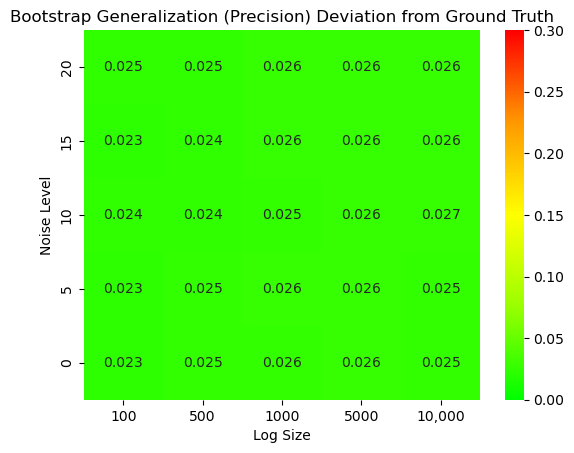

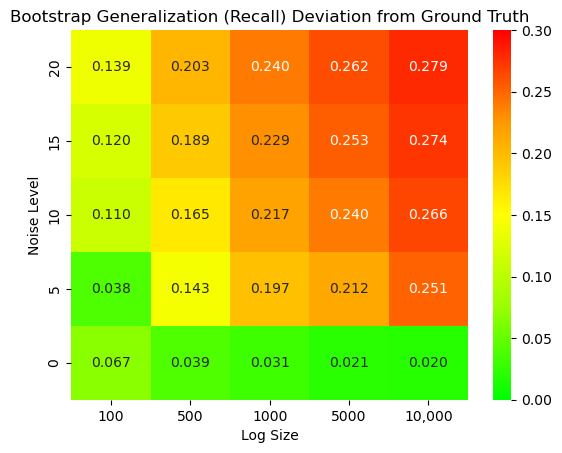

In [143]:
log_sizes = [100, 500, 1000, 5000, 10000]
noises = [0, 5, 10, 15, 20]

data_precision_0 = []
data_recall_0 = []

# Iterate through log_sizes and noises
for noise in noises:
    precision_row = []
    recall_row = []
    
    for log_size in log_sizes:
        csv_file = "/Users/anandik/OneDrive - The University of Melbourne/GR/Code/BootstrapGeneralizationBasic_GR/src/main/java/org/bootstrap/resources/log0/oa/output-" + str(log_size) + "-" + str(noise) + ".csv"
        precision_sum = 0.0
        recall_sum = 0.0
        num_rows = 0
        
        with open(csv_file, 'r') as file:
            csv_reader = csv.reader(file)
            for row in csv_reader:
                if len(row) >= 4:
                    precision = float(row[2])
                    recall = float(row[3])
                    precision_sum += precision
                    recall_sum += recall
                    num_rows += 1
        
        if num_rows > 0:
            precision_row.append(precision_sum / num_rows)
            recall_row.append(recall_sum / num_rows)
        else:
            precision_row.append(0.0)  # Handle the case where there are no rows
            recall_row.append(0.0)
    
    data_precision_0.append(precision_row)
    data_recall_0.append(recall_row)

# Print the 2D arrays
for row in data_precision_0:
    print(row)
    
for row in data_recall_0:
    print(row)
    
# ground truth
real_precisions = [0.8673107114012689, 0.8673107114813179, 0.8673107133593535, 0.8673106992552186, 0.8673107112920542]
real_recalls = [0.8673107114012663, 0.8673107114012671, 0.8673107114012675, 0.867310711401268, 0.8673107114012683]

real_precision = sum(real_precisions) / len(real_precisions)
real_recall = sum(real_recalls) / len(real_recalls)

print(real_precision)
print(real_recall)

deviation_precision_0 = []
for row in data_precision_0:
    precision_row = []
    for value in row:
        precision_row.append(abs(value - real_precision))
    deviation_precision_0.append(precision_row)

deviation_recall_0 = []
for row in data_recall_0:
    recall_row = []
    for value in row:
        recall_row.append(abs(value - real_recall))
    deviation_recall_0.append(recall_row)
    
print(deviation_precision_0 )
print(deviation_recall_0 )

x_labels = ['100', '500', '1000', '5000', '10,000']
y_labels = ['0', '5', '10', '15', '20']

boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

# Create the heatmap with the custom colormap
sns.heatmap(deviation_precision_0, annot=True, cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.3, fmt='.3f')

ax = plt.gca()
ax.invert_yaxis()

plt.title("Bootstrap Generalization (Precision) Deviation from Ground Truth")
plt.xlabel("Log Size")
plt.ylabel("Noise Level")

plt.savefig('precision_3_oa_0.svg', format='svg')

plt.show()

boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

# Create the heatmap with the custom colormap
sns.heatmap(deviation_recall_0, annot=True, cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.3, fmt='.3f')

ax = plt.gca()
ax.invert_yaxis()

plt.title("Bootstrap Generalization (Recall) Deviation from Ground Truth")
plt.xlabel("Log Size")
plt.ylabel("Noise Level")

plt.savefig('recall_3_oa_0.svg', format='svg')

plt.show()

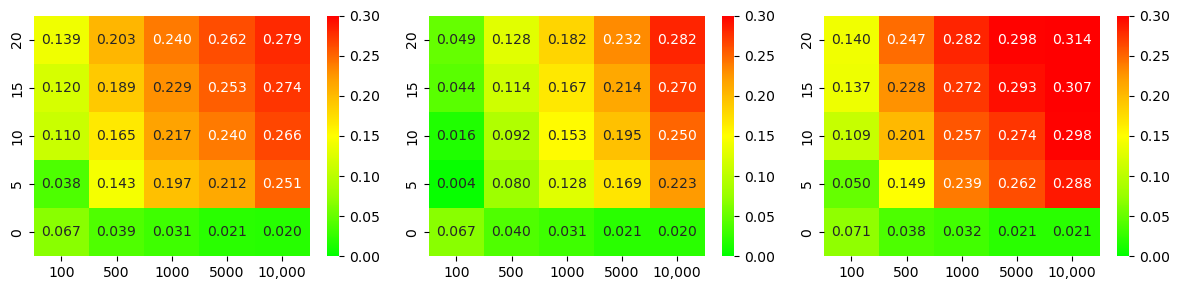

In [144]:
# different g

excel_file = '/Users/anandik/OneDrive - The University of Melbourne/GR/Experiments/LogQualityV3/data-noise.xlsx'
sheet_name = 'v3'
df = pd.read_excel(excel_file, sheet_name=sheet_name)

# Define the number of heatmaps (5x5)
num_heatmaps = 3

# Determine the number of rows and columns in each heatmap
heatmap_rows = 5
heatmap_cols = 5

# Determine the number of data points for each heatmap
data_per_heatmap = heatmap_rows * heatmap_cols

# Check if the data is sufficient for the specified number of heatmaps
if len(df) < num_heatmaps * data_per_heatmap:
    raise ValueError("Not enough data for the specified number of heatmaps.")

# Create subplots for the heatmaps
# fig, axes = plt.subplots(num_heatmaps, 1, figsize=(8, 10))
df2 = df['bRecErr']
# x_labels = ['100', '500', '1000', '5000', '10,000']
# y_labels = ['0', '5', '10', '15', '20']

# # Iterate through each heatmap
# for i in range(num_heatmaps):
#     data_slice = df2[i * data_per_heatmap: (i + 1) * data_per_heatmap]

#     # Reshape the data into a 2D array (5x5)
#     heatmap_data = np.array(data_slice).reshape(heatmap_rows, heatmap_cols).T
    
#     colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

# # Create a custom colormap
#     custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

# # Create the heatmap with the custom colormap
#     ax = sns.heatmap(heatmap_data, annot=True, ax=axes[i], cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.3, fmt='.3f')
#     ax.invert_yaxis()
#     # Create the heatmap
# #     ax = sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', ax=axes[i])
#     ax.set_title(f'Heatmap {i + 1}')

    
# plt.subplots_adjust(hspace=0.5)
# plt.tight_layout()
# plt.show()

fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Flatten the 2D array of axes to iterate over them
axes = axes.flatten()

# Iterate through each heatmap
for i in range(num_heatmaps):
    data_slice = df2[i * data_per_heatmap: (i + 1) * data_per_heatmap]

    # Reshape the data into a 2D array (5x5)
    heatmap_data = np.array(data_slice).reshape(heatmap_rows, heatmap_cols).T
    
    colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

    # Create a custom colormap
    custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

    # Create the heatmap with the custom colormap
    ax = sns.heatmap(heatmap_data, annot=True, ax=axes[i], cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.3, fmt='.3f')
    ax.invert_yaxis()
#     ax.set_title(f'Heatmap {i + 1}')

plt.tight_layout()
plt.savefig('/Users/anandik/OneDrive - The University of Melbourne/GR/Experiments/LogQualityV3/heatmap_recall.svg', format='svg')
plt.show()

0      0.067164
1      0.045383
2      0.104309
3      0.122833
4      0.138893
         ...   
295    0.018440
296    0.181360
297    0.183505
298    0.202134
299    0.212849
Name: bRecConstgErr, Length: 300, dtype: float64


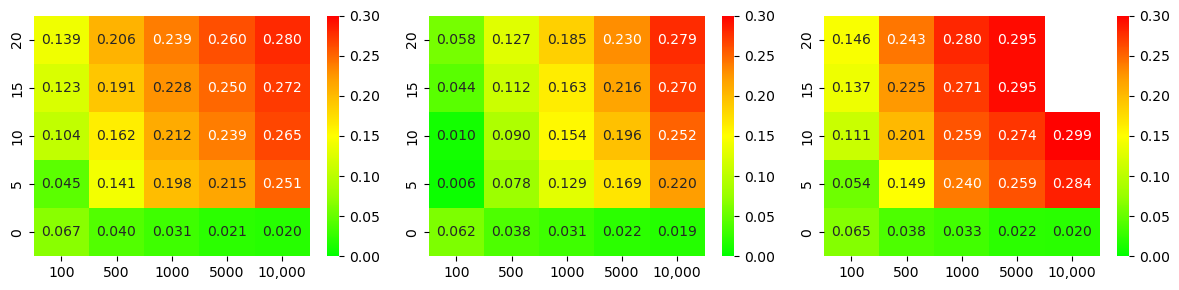

In [145]:
# const g

excel_file = '/Users/anandik/OneDrive - The University of Melbourne/GR/Experiments/LogQualityV3/data-noise.xlsx'
sheet_name = 'v3'
df = pd.read_excel(excel_file, sheet_name=sheet_name)

# Define the number of heatmaps (5x5)
num_heatmaps = 3

# Determine the number of rows and columns in each heatmap
heatmap_rows = 5
heatmap_cols = 5

# Determine the number of data points for each heatmap
data_per_heatmap = heatmap_rows * heatmap_cols

# Check if the data is sufficient for the specified number of heatmaps
if len(df) < num_heatmaps * data_per_heatmap:
    raise ValueError("Not enough data for the specified number of heatmaps.")

# Create subplots for the heatmaps
# fig, axes = plt.subplots(num_heatmaps, 1, figsize=(8, 10))
df2 = df['bRecConstgErr']
print(df2)
# x_labels = ['100', '500', '1000', '5000', '10,000']
# y_labels = ['0', '5', '10', '15', '20']

# # Iterate through each heatmap
# for i in range(num_heatmaps):
#     data_slice = df2[i * data_per_heatmap: (i + 1) * data_per_heatmap]

#     # Reshape the data into a 2D array (5x5)
#     heatmap_data = np.array(data_slice).reshape(heatmap_rows, heatmap_cols).T
    
#     colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

# # Create a custom colormap
#     custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

# # Create the heatmap with the custom colormap
#     ax = sns.heatmap(heatmap_data, annot=True, ax=axes[i], cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.3, fmt='.3f')
#     ax.invert_yaxis()
#     # Create the heatmap
# #     ax = sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', ax=axes[i])
#     ax.set_title(f'Heatmap {i + 1}')

    
# plt.subplots_adjust(hspace=0.5)
# plt.tight_layout()
# plt.show()

fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Flatten the 2D array of axes to iterate over them
axes = axes.flatten()

# Iterate through each heatmap
for i in range(num_heatmaps):
    data_slice = df2[i * data_per_heatmap: (i + 1) * data_per_heatmap]

    # Reshape the data into a 2D array (5x5)
    heatmap_data = np.array(data_slice).reshape(heatmap_rows, heatmap_cols).T
    
    colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

    # Create a custom colormap
    custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

    # Create the heatmap with the custom colormap
    ax = sns.heatmap(heatmap_data, annot=True, ax=axes[i], cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.3, fmt='.3f')
    ax.invert_yaxis()
#     ax.set_title(f'Heatmap {i + 1}')

plt.tight_layout()
plt.savefig('/Users/anandik/OneDrive - The University of Melbourne/GR/Experiments/LogQualityV3/heatmap_recall.svg', format='svg')
plt.show()

0      0.067185
1      0.037930
2      0.110460
3      0.120083
4      0.138958
         ...   
295    0.019136
296    0.182571
297    0.183332
298    0.198698
299    0.210614
Name: bRecErr, Length: 300, dtype: float64


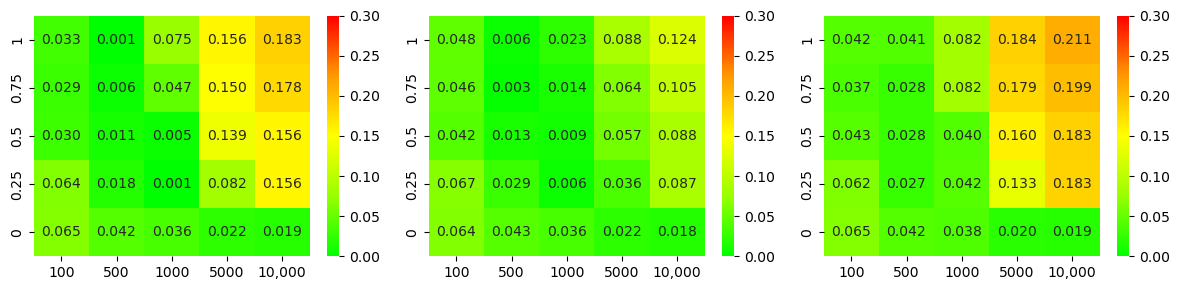

In [146]:
excel_file = '/Users/anandik/OneDrive - The University of Melbourne/GR/Experiments/LogQualityV3/data-noise.xlsx'
sheet_name = 'v3'
df = pd.read_excel(excel_file, sheet_name=sheet_name)

low_noise_levels = [0, 0.25, 0.5, 0.75, 1]

# Define the number of heatmaps (5x5)
num_heatmaps = 3

# Determine the number of rows and columns in each heatmap
heatmap_rows = 5
heatmap_cols = 5

# Determine the number of data points for each heatmap
data_per_heatmap = heatmap_rows * heatmap_cols

# Check if the data is sufficient for the specified number of heatmaps
if len(df) < num_heatmaps * data_per_heatmap:
    raise ValueError("Not enough data for the specified number of heatmaps.")

# Create subplots for the heatmaps
# fig, axes = plt.subplots(num_heatmaps, 1, figsize=(8, 10))
df2 = df['bRecErr']
print(df2)
# x_labels = ['100', '500', '1000', '5000', '10,000']
# y_labels = ['0', '5', '10', '15', '20']

# # Iterate through each heatmap
# for i in range(num_heatmaps):
#     data_slice = df2[i * data_per_heatmap: (i + 1) * data_per_heatmap]

#     # Reshape the data into a 2D array (5x5)
#     heatmap_data = np.array(data_slice).reshape(heatmap_rows, heatmap_cols).T
    
#     colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

# # Create a custom colormap
#     custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

# # Create the heatmap with the custom colormap
#     ax = sns.heatmap(heatmap_data, annot=True, ax=axes[i], cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.3, fmt='.3f')
#     ax.invert_yaxis()
#     # Create the heatmap
# #     ax = sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', ax=axes[i])
#     ax.set_title(f'Heatmap {i + 1}')

    
# plt.subplots_adjust(hspace=0.5)
# plt.tight_layout()
# plt.show()

fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Flatten the 2D array of axes to iterate over them
axes = axes.flatten()

# Iterate through each heatmap
for i in range(num_heatmaps):
    j = i + 9
    data_slice = df2[j * data_per_heatmap: (j + 1) * data_per_heatmap]

    # Reshape the data into a 2D array (5x5)
    heatmap_data = np.array(data_slice).reshape(heatmap_rows, heatmap_cols).T
    
    colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

    # Create a custom colormap
    custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

    # Create the heatmap with the custom colormap
    ax = sns.heatmap(heatmap_data, annot=True, ax=axes[i], cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=low_noise_levels, vmin=0, vmax=0.3, fmt='.3f')
    ax.invert_yaxis()
#     ax.set_title(f'Heatmap {i + 1}')

plt.tight_layout()
plt.savefig('/Users/anandik/OneDrive - The University of Melbourne/GR/Experiments/LogQualityV3/heatmap_recall.svg', format='svg')
plt.show()

0      0.067164
1      0.045383
2      0.104309
3      0.122833
4      0.138893
         ...   
295    0.018440
296    0.181360
297    0.183505
298    0.202134
299    0.212849
Name: bRecConstgErr, Length: 300, dtype: float64


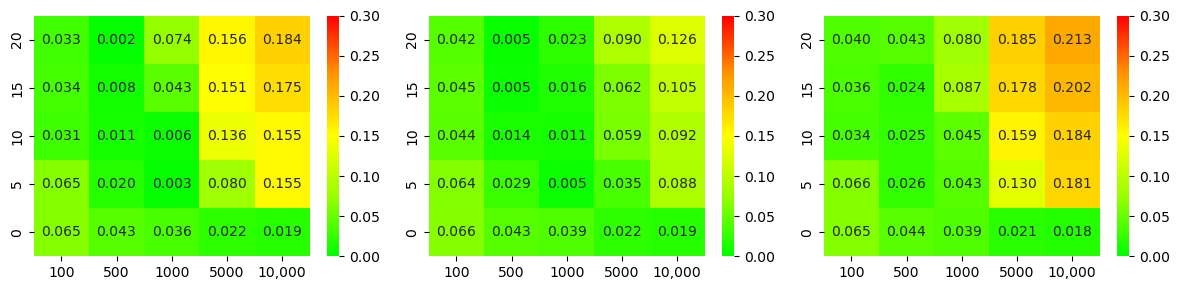

In [147]:
excel_file = '/Users/anandik/OneDrive - The University of Melbourne/GR/Experiments/LogQualityV3/data-noise.xlsx'
sheet_name = 'v3'
df = pd.read_excel(excel_file, sheet_name=sheet_name)

# Define the number of heatmaps (5x5)
num_heatmaps = 3

# Determine the number of rows and columns in each heatmap
heatmap_rows = 5
heatmap_cols = 5

# Determine the number of data points for each heatmap
data_per_heatmap = heatmap_rows * heatmap_cols

# Check if the data is sufficient for the specified number of heatmaps
if len(df) < num_heatmaps * data_per_heatmap:
    raise ValueError("Not enough data for the specified number of heatmaps.")

# Create subplots for the heatmaps
# fig, axes = plt.subplots(num_heatmaps, 1, figsize=(8, 10))
df2 = df['bRecConstgErr']
print(df2)
# x_labels = ['100', '500', '1000', '5000', '10,000']
# y_labels = ['0', '5', '10', '15', '20']

# # Iterate through each heatmap
# for i in range(num_heatmaps):
#     data_slice = df2[i * data_per_heatmap: (i + 1) * data_per_heatmap]

#     # Reshape the data into a 2D array (5x5)
#     heatmap_data = np.array(data_slice).reshape(heatmap_rows, heatmap_cols).T
    
#     colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

# # Create a custom colormap
#     custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

# # Create the heatmap with the custom colormap
#     ax = sns.heatmap(heatmap_data, annot=True, ax=axes[i], cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.3, fmt='.3f')
#     ax.invert_yaxis()
#     # Create the heatmap
# #     ax = sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', ax=axes[i])
#     ax.set_title(f'Heatmap {i + 1}')

    
# plt.subplots_adjust(hspace=0.5)
# plt.tight_layout()
# plt.show()

fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Flatten the 2D array of axes to iterate over them
axes = axes.flatten()

# Iterate through each heatmap
for i in range(num_heatmaps):
    j = i + 9
    data_slice = df2[j * data_per_heatmap: (j + 1) * data_per_heatmap]

    # Reshape the data into a 2D array (5x5)
    heatmap_data = np.array(data_slice).reshape(heatmap_rows, heatmap_cols).T
    
    colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

    # Create a custom colormap
    custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

    # Create the heatmap with the custom colormap
    ax = sns.heatmap(heatmap_data, annot=True, ax=axes[i], cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.3, fmt='.3f')
    ax.invert_yaxis()
#     ax.set_title(f'Heatmap {i + 1}')

plt.tight_layout()
plt.savefig('/Users/anandik/OneDrive - The University of Melbourne/GR/Experiments/LogQualityV3/heatmap_recall.svg', format='svg')
plt.show()

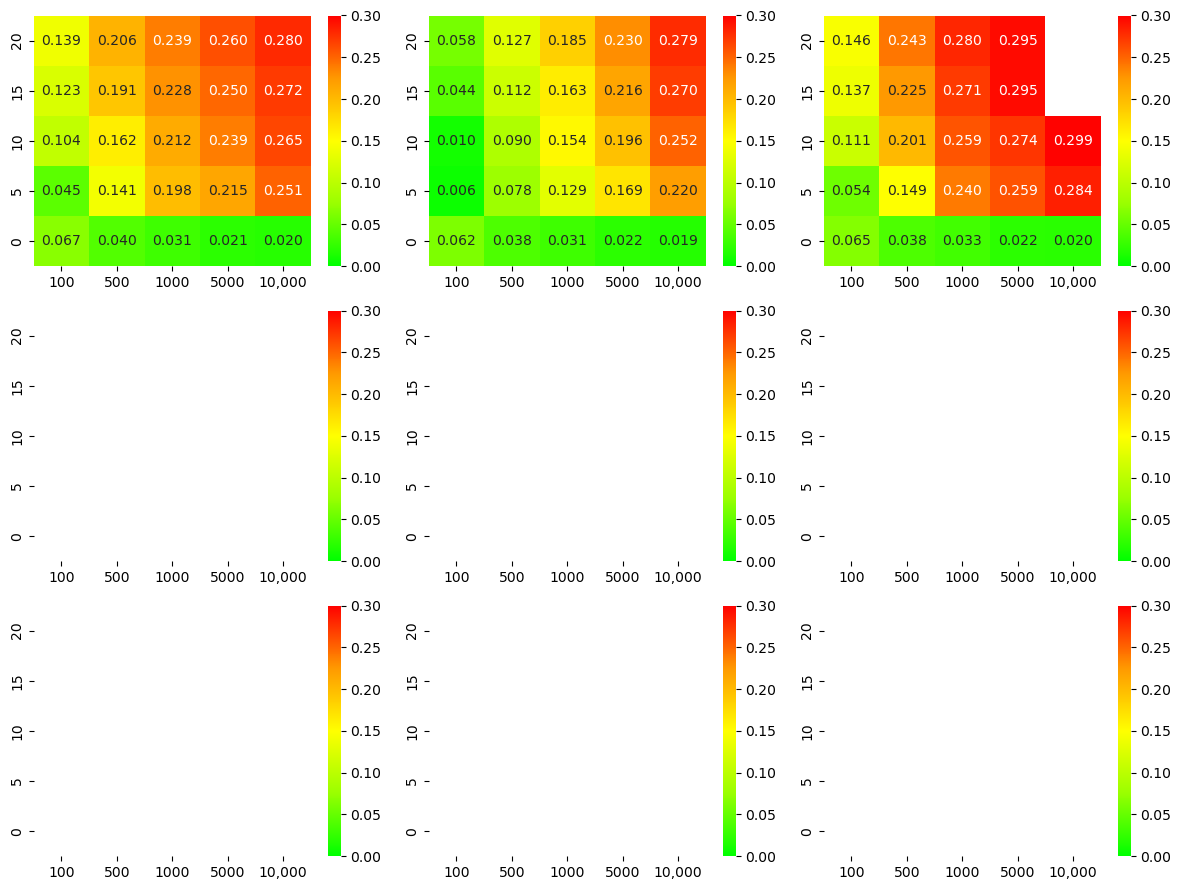

In [148]:
excel_file = '/Users/anandik/OneDrive - The University of Melbourne/GR/Experiments/LogQualityV3/data-noise.xlsx'
sheet_name = 'v3'
df = pd.read_excel(excel_file, sheet_name=sheet_name)

# Define the number of heatmaps (5x5)
num_heatmaps = 9

# Determine the number of rows and columns in each heatmap
heatmap_rows = 5
heatmap_cols = 5

# Determine the number of data points for each heatmap
data_per_heatmap = heatmap_rows * heatmap_cols

# Check if the data is sufficient for the specified number of heatmaps
if len(df) < num_heatmaps * data_per_heatmap:
    raise ValueError("Not enough data for the specified number of heatmaps.")

# Create subplots for the heatmaps
# fig, axes = plt.subplots(num_heatmaps, 1, figsize=(8, 10))
df2 = df['bRecConstgErr']
# x_labels = ['100', '500', '1000', '5000', '10,000']
# y_labels = ['0', '5', '10', '15', '20']

# # Iterate through each heatmap
# for i in range(num_heatmaps):
#     data_slice = df2[i * data_per_heatmap: (i + 1) * data_per_heatmap]

#     # Reshape the data into a 2D array (5x5)
#     heatmap_data = np.array(data_slice).reshape(heatmap_rows, heatmap_cols).T
    
#     colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

# # Create a custom colormap
#     custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

# # Create the heatmap with the custom colormap
#     ax = sns.heatmap(heatmap_data, annot=True, ax=axes[i], cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.3, fmt='.3f')
#     ax.invert_yaxis()
#     # Create the heatmap
# #     ax = sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', ax=axes[i])
#     ax.set_title(f'Heatmap {i + 1}')

    
# plt.subplots_adjust(hspace=0.5)
# plt.tight_layout()
# plt.show()

fig, axes = plt.subplots(3, 3, figsize=(12, 9))

# Flatten the 2D array of axes to iterate over them
axes = axes.flatten()

# Iterate through each heatmap
for i in range(num_heatmaps):
    data_slice = df2[i * data_per_heatmap: (i + 1) * data_per_heatmap]

    # Reshape the data into a 2D array (5x5)
    heatmap_data = np.array(data_slice).reshape(heatmap_rows, heatmap_cols).T
    
    colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

    # Create a custom colormap
    custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

    # Create the heatmap with the custom colormap
    ax = sns.heatmap(heatmap_data, annot=True, ax=axes[i], cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.3, fmt='.3f')
    ax.invert_yaxis()
#     ax.set_title(f'Heatmap {i + 1}')

plt.tight_layout()
plt.savefig('/Users/anandik/OneDrive - The University of Melbourne/GR/Experiments/LogQualityV3/heatmap_precision.svg', format='svg')
plt.show()

[0.8451023173375227, 0.8432557159825598, 0.842004730679659, 0.8411524182758436, 0.842417536630446]
[0.8444002081328503, 0.8489761255856103, 0.8862734448495095, 0.8905628010626951, 0.8944428635866566]
[0.8484328420124896, 0.8752111569009241, 0.8867863655704356, 0.8930133213265781, 0.8952273939203603]
[0.8479232116607038, 0.8822520721362337, 0.8870760221652174, 0.8939243019805188, 0.8951418776796221]
[0.8487177745811754, 0.8864687633846737, 0.8889474376090567, 0.8948307781294805, 0.895460087089263]
[0.9345716307885533, 0.9068788132928796, 0.8980670694076167, 0.8878463950725186, 0.8876058014962281]
[0.8715288347675826, 0.7876294720692321, 0.7395984716856969, 0.6982008697072712, 0.644197934886739]
[0.8509878881754716, 0.775580905157325, 0.7139895681687524, 0.6724556076054298, 0.6172743023695375]
[0.8237351647915687, 0.753050227899438, 0.6999562987585752, 0.6531404718579944, 0.596921899669674]
[0.8178763611087845, 0.7391776566427328, 0.6857705334916306, 0.6355571873426136, 0.585128614297817

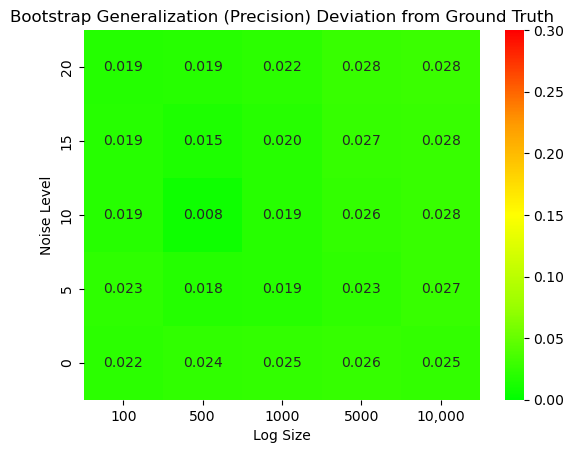

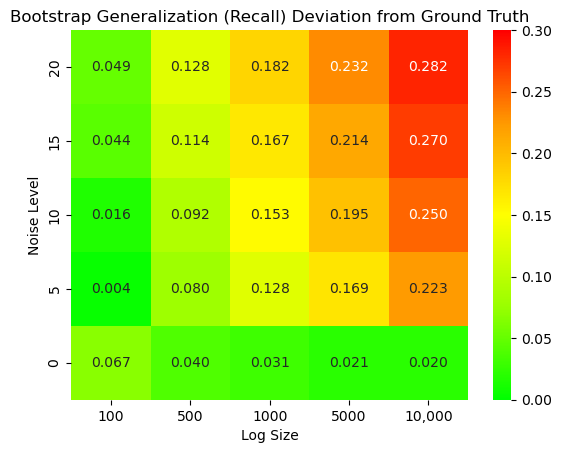

In [99]:
log_sizes = [100, 500, 1000, 5000, 10000]
noises = [0, 5, 10, 15, 20]

data_precision_0 = []
data_recall_0 = []

# Iterate through log_sizes and noises
for noise in noises:
    precision_row = []
    recall_row = []
    
    for log_size in log_sizes:
        csv_file = "/Users/anandik/OneDrive - The University of Melbourne/GR/Code/BootstrapGeneralizationBasic_GR/src/main/java/org/bootstrap/resources/log0/ia/output-" + str(log_size) + "-" + str(noise) + ".csv"
        precision_sum = 0.0
        recall_sum = 0.0
        num_rows = 0
        
        with open(csv_file, 'r') as file:
            csv_reader = csv.reader(file)
            for row in csv_reader:
                if len(row) >= 4:
                    precision = float(row[2])
                    recall = float(row[3])
                    precision_sum += precision
                    recall_sum += recall
                    num_rows += 1
        
        if num_rows > 0:
            precision_row.append(precision_sum / num_rows)
            recall_row.append(recall_sum / num_rows)
        else:
            precision_row.append(0.0)  # Handle the case where there are no rows
            recall_row.append(0.0)
    
    data_precision_0.append(precision_row)
    data_recall_0.append(recall_row)

# Print the 2D arrays
for row in data_precision_0:
    print(row)
    
for row in data_recall_0:
    print(row)
    
# ground truth
real_precisions = [0.8673107114012689, 0.8673107114813179, 0.8673107133593535, 0.8673106992552186, 0.8673107112920542]
real_recalls = [0.8673107114012663, 0.8673107114012671, 0.8673107114012675, 0.867310711401268, 0.8673107114012683]

real_precision = sum(real_precisions) / len(real_precisions)
real_recall = sum(real_recalls) / len(real_recalls)

print(real_precision)
print(real_recall)

deviation_precision_0 = []
for row in data_precision_0:
    precision_row = []
    for value in row:
        precision_row.append(abs(value - real_precision))
    deviation_precision_0.append(precision_row)

deviation_recall_0 = []
for row in data_recall_0:
    recall_row = []
    for value in row:
        recall_row.append(abs(value - real_recall))
    deviation_recall_0.append(recall_row)
    
print(deviation_precision_0 )
print(deviation_recall_0 )

x_labels = ['100', '500', '1000', '5000', '10,000']
y_labels = ['0', '5', '10', '15', '20']

boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

# Create the heatmap with the custom colormap
sns.heatmap(deviation_precision_0, annot=True, cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.3, fmt='.3f')

ax = plt.gca()
ax.invert_yaxis()

plt.title("Bootstrap Generalization (Precision) Deviation from Ground Truth")
plt.xlabel("Log Size")
plt.ylabel("Noise Level")

plt.savefig('precision_3_ia_0.svg', format='svg')

plt.show()

boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

# Create the heatmap with the custom colormap
sns.heatmap(deviation_recall_0, annot=True, cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.3, fmt='.3f')

ax = plt.gca()
ax.invert_yaxis()

plt.title("Bootstrap Generalization (Recall) Deviation from Ground Truth")
plt.xlabel("Log Size")
plt.ylabel("Noise Level")

plt.savefig('recall_3_ia_0.svg', format='svg')

plt.show()

[0.8449664154769452, 0.8418812440213121, 0.8433143532663518, 0.8412989973701279, 0.8430884661560658]
[0.8435960940096481, 0.8421946275381533, 0.8420943185529005, 0.8416038173317704, 0.8708586637734033]
[0.8432835251331139, 0.843570045436968, 0.842199580429388, 0.8626721859571678, 0.8769456847947226]
[0.8426287817043904, 0.8423067898243113, 0.8416735350638782, 0.8611555673771774, 0.8798878112124546]
[0.8430440095032313, 0.8424734074463864, 0.8423876928523109, 0.870705397689449, 0.882656058321808]
[0.938733330050928, 0.9055294937582885, 0.8994545307098326, 0.8880262139871151, 0.887919590689479]
[0.8174145304888836, 0.7180155994199846, 0.6281622496051548, 0.6054115910295976, 0.5792161505747728]
[0.7583674500308341, 0.6664978755435202, 0.6106007468017667, 0.5934873068540903, 0.568839872536383]
[0.7301803222459813, 0.639749965638666, 0.5949286990539093, 0.5743489870280247, 0.5604917950164379]
[0.726839974193635, 0.6204452075974287, 0.5850267741995392, 0.5688895685317314, 0.5537095537191612]

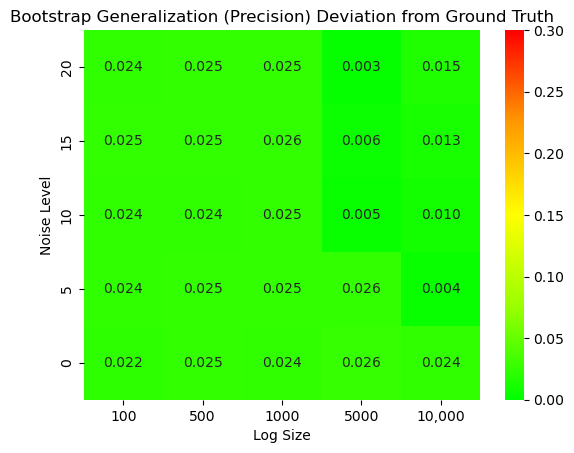

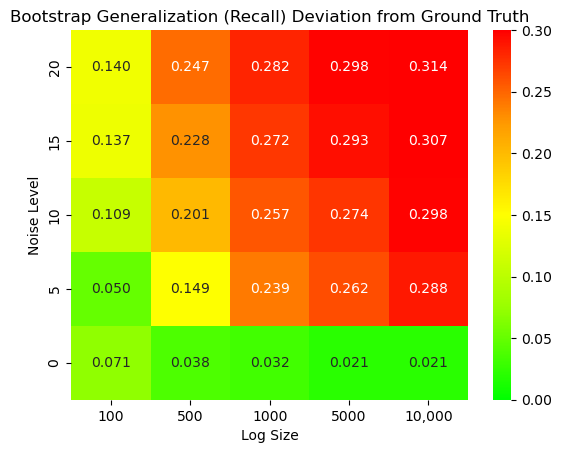

In [100]:
log_sizes = [100, 500, 1000, 5000, 10000]
noises = [0, 5, 10, 15, 20]

data_precision_0 = []
data_recall_0 = []

# Iterate through log_sizes and noises
for noise in noises:
    precision_row = []
    recall_row = []
    
    for log_size in log_sizes:
        csv_file = "/Users/anandik/OneDrive - The University of Melbourne/GR/Code/BootstrapGeneralizationBasic_GR/src/main/java/org/bootstrap/resources/log0/ooo/output-" + str(log_size) + "-" + str(noise) + ".csv"
        precision_sum = 0.0
        recall_sum = 0.0
        num_rows = 0
        
        with open(csv_file, 'r') as file:
            csv_reader = csv.reader(file)
            for row in csv_reader:
                if len(row) >= 4:
                    precision = float(row[2])
                    recall = float(row[3])
                    precision_sum += precision
                    recall_sum += recall
                    num_rows += 1
        
        if num_rows > 0:
            precision_row.append(precision_sum / num_rows)
            recall_row.append(recall_sum / num_rows)
        else:
            precision_row.append(0.0)  # Handle the case where there are no rows
            recall_row.append(0.0)
    
    data_precision_0.append(precision_row)
    data_recall_0.append(recall_row)

# Print the 2D arrays
for row in data_precision_0:
    print(row)
    
for row in data_recall_0:
    print(row)
    
# ground truth
real_precisions = [0.8673107114012689, 0.8673107114813179, 0.8673107133593535, 0.8673106992552186, 0.8673107112920542]
real_recalls = [0.8673107114012663, 0.8673107114012671, 0.8673107114012675, 0.867310711401268, 0.8673107114012683]

real_precision = sum(real_precisions) / len(real_precisions)
real_recall = sum(real_recalls) / len(real_recalls)

print(real_precision)
print(real_recall)

deviation_precision_0 = []
for row in data_precision_0:
    precision_row = []
    for value in row:
        precision_row.append(abs(value - real_precision))
    deviation_precision_0.append(precision_row)

deviation_recall_0 = []
for row in data_recall_0:
    recall_row = []
    for value in row:
        recall_row.append(abs(value - real_recall))
    deviation_recall_0.append(recall_row)
    
print(deviation_precision_0 )
print(deviation_recall_0 )

x_labels = ['100', '500', '1000', '5000', '10,000']
y_labels = ['0', '5', '10', '15', '20']

boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

# Create the heatmap with the custom colormap
sns.heatmap(deviation_precision_0, annot=True, cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.3, fmt='.3f')

ax = plt.gca()
ax.invert_yaxis()

plt.title("Bootstrap Generalization (Precision) Deviation from Ground Truth")
plt.xlabel("Log Size")
plt.ylabel("Noise Level")

plt.savefig('precision_3_ooo_0.svg', format='svg')

plt.show()

boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

# Create the heatmap with the custom colormap
sns.heatmap(deviation_recall_0, annot=True, cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.3, fmt='.3f')

ax = plt.gca()
ax.invert_yaxis()

plt.title("Bootstrap Generalization (Recall) Deviation from Ground Truth")
plt.xlabel("Log Size")
plt.ylabel("Noise Level")

plt.savefig('recall_3_ooo_0.svg', format='svg')

plt.show()

[0.8406437308466115, 0.8442756222183265, 0.8419968462498733, 0.8411413694386508, 0.8431106511240126]
[0.8419880878823781, 0.8443032944647273, 0.8433588486124853, 0.8417030402691563, 0.8409359573988606]
[0.8417157921722629, 0.8446513662696997, 0.8426586440789352, 0.8411100103187731, 0.8414372519427726]
[0.8408253613685707, 0.8446713743803851, 0.8433837677987699, 0.8417250313586889, 0.8409043824360094]
[0.839799291937063, 0.8442434603745008, 0.8426759943844108, 0.8440902252744313, 0.8414874983908438]
[0.9289543969721465, 0.9077090097154864, 0.9005203532987878, 0.8890466586607549, 0.8892605596161027]
[0.8154829235414571, 0.710241992416226, 0.6702187328009432, 0.6580408566518328, 0.6140481067754684]
[0.7607996785321167, 0.6886623098490179, 0.6557416622469606, 0.6274454590667278, 0.6031927903203076]
[0.7252968051474384, 0.6735032704369316, 0.6440979619970799, 0.6145442864559192, 0.5951667008420858]
[0.713923096246246, 0.6618159802207582, 0.6328928243149938, 0.6077774670927203, 0.58888841413

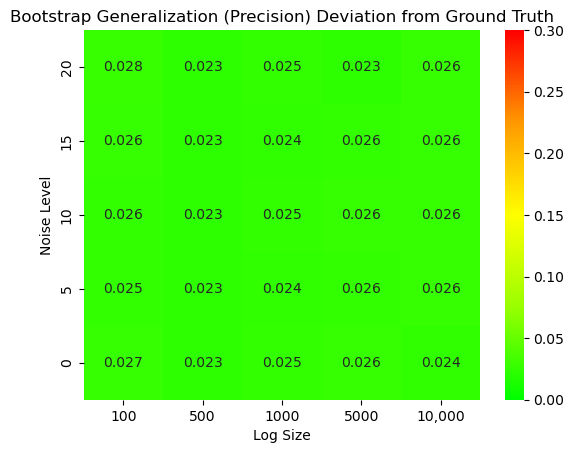

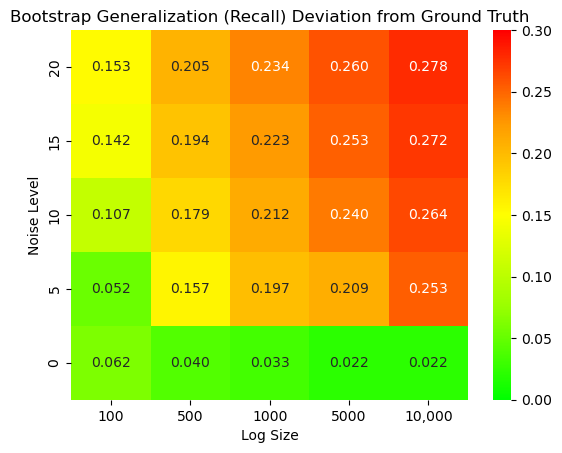

In [101]:
log_sizes = [100, 500, 1000, 5000, 10000]
noises = [0, 5, 10, 15, 20]

data_precision_0 = []
data_recall_0 = []

# Iterate through log_sizes and noises
for noise in noises:
    precision_row = []
    recall_row = []
    
    for log_size in log_sizes:
        csv_file = "/Users/anandik/OneDrive - The University of Melbourne/GR/Code/BootstrapGeneralizationBasic_GR/src/main/java/org/bootstrap/resources/log1/oa/output-" + str(log_size) + "-" + str(noise) + ".csv"
        precision_sum = 0.0
        recall_sum = 0.0
        num_rows = 0
        
        with open(csv_file, 'r') as file:
            csv_reader = csv.reader(file)
            for row in csv_reader:
                if len(row) >= 4:
                    precision = float(row[2])
                    recall = float(row[3])
                    precision_sum += precision
                    recall_sum += recall
                    num_rows += 1
        
        if num_rows > 0:
            precision_row.append(precision_sum / num_rows)
            recall_row.append(recall_sum / num_rows)
        else:
            precision_row.append(0.0)  # Handle the case where there are no rows
            recall_row.append(0.0)
    
    data_precision_0.append(precision_row)
    data_recall_0.append(recall_row)

# Print the 2D arrays
for row in data_precision_0:
    print(row)
    
for row in data_recall_0:
    print(row)
    
# ground truth
real_precisions = [0.8673107114012689, 0.8673107114813179, 0.8673107133593535, 0.8673106992552186, 0.8673107112920542]
real_recalls = [0.8673107114012663, 0.8673107114012671, 0.8673107114012675, 0.867310711401268, 0.8673107114012683]

real_precision = sum(real_precisions) / len(real_precisions)
real_recall = sum(real_recalls) / len(real_recalls)

print(real_precision)
print(real_recall)

deviation_precision_0 = []
for row in data_precision_0:
    precision_row = []
    for value in row:
        precision_row.append(abs(value - real_precision))
    deviation_precision_0.append(precision_row)

deviation_recall_0 = []
for row in data_recall_0:
    recall_row = []
    for value in row:
        recall_row.append(abs(value - real_recall))
    deviation_recall_0.append(recall_row)
    
print(deviation_precision_0 )
print(deviation_recall_0 )

x_labels = ['100', '500', '1000', '5000', '10,000']
y_labels = ['0', '5', '10', '15', '20']

boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

# Create the heatmap with the custom colormap
sns.heatmap(deviation_precision_0, annot=True, cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.3, fmt='.3f')

ax = plt.gca()
ax.invert_yaxis()

plt.title("Bootstrap Generalization (Precision) Deviation from Ground Truth")
plt.xlabel("Log Size")
plt.ylabel("Noise Level")

plt.savefig('precision_3_oa_1.svg', format='svg')

plt.show()

boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

# Create the heatmap with the custom colormap
sns.heatmap(deviation_recall_0, annot=True, cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.3, fmt='.3f')

ax = plt.gca()
ax.invert_yaxis()

plt.title("Bootstrap Generalization (Recall) Deviation from Ground Truth")
plt.xlabel("Log Size")
plt.ylabel("Noise Level")

plt.savefig('recall_3_oa_1.svg', format='svg')

plt.show()

[0.8406999462802647, 0.8441441774139135, 0.8433060743320393, 0.8416786952471983]
[0.8417591432120507, 0.8663970715059118, 0.8729763632632161, 0.8747543341996105]
[0.8548132685278576, 0.8714566608463112, 0.8741546936058662, 0.8753009774979835]
[0.8594527367145169, 0.8736660573859658, 0.873381641599788, 0.8762655706408119]
[0.8546968201983767, 0.8720395360448739, 0.8727955327685495, 0.8759142149096303]
[0.9234273313149881, 0.9067265660899527, 0.9019122331333917, 0.889685126933804]
[0.8236348454445149, 0.7069648054125142, 0.6516525056697922, 0.6336043055162032]
[0.7632585654080994, 0.6834510937812868, 0.6326515689463693, 0.6025496772586509]
[0.7303497268238966, 0.6628072342957192, 0.6198644455006745, 0.5848769944730279]
[0.6983232639235605, 0.6428189188802901, 0.6071654693195864, 0.5739112242031874]
0.8673107093578427
0.8673107114012673
[[0.026610763077578037, 0.02316653194392926, 0.02400463502580341, 0.02563201411064442], [0.025551566145792015, 0.0009136378519308819, 0.005665653905373436

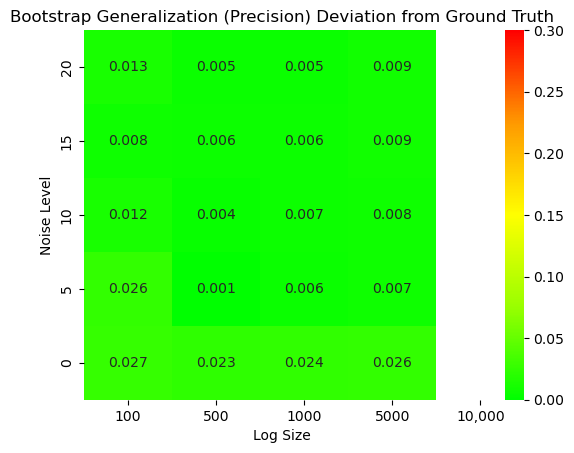

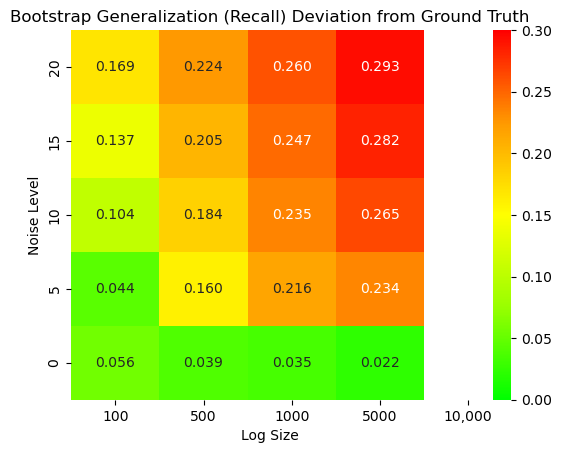

In [104]:
log_sizes = [100, 500, 1000, 5000]
noises = [0, 5, 10, 15, 20]

data_precision_0 = []
data_recall_0 = []

# Iterate through log_sizes and noises
for noise in noises:
    precision_row = []
    recall_row = []
    
    for log_size in log_sizes:
        csv_file = "/Users/anandik/OneDrive - The University of Melbourne/GR/Code/BootstrapGeneralizationBasic_GR copy 2/src/main/java/org/bootstrap/resources/log1/ooo/output-" + str(log_size) + "-" + str(noise) + ".csv"
        precision_sum = 0.0
        recall_sum = 0.0
        num_rows = 0
        
        with open(csv_file, 'r') as file:
            csv_reader = csv.reader(file)
            for row in csv_reader:
                if len(row) >= 4:
                    precision = float(row[2])
                    recall = float(row[3])
                    precision_sum += precision
                    recall_sum += recall
                    num_rows += 1
        
        if num_rows > 0:
            precision_row.append(precision_sum / num_rows)
            recall_row.append(recall_sum / num_rows)
        else:
            precision_row.append(0.0)  # Handle the case where there are no rows
            recall_row.append(0.0)
    
    data_precision_0.append(precision_row)
    data_recall_0.append(recall_row)

# Print the 2D arrays
for row in data_precision_0:
    print(row)
    
for row in data_recall_0:
    print(row)
    
# ground truth
real_precisions = [0.8673107114012689, 0.8673107114813179, 0.8673107133593535, 0.8673106992552186, 0.8673107112920542]
real_recalls = [0.8673107114012663, 0.8673107114012671, 0.8673107114012675, 0.867310711401268, 0.8673107114012683]

real_precision = sum(real_precisions) / len(real_precisions)
real_recall = sum(real_recalls) / len(real_recalls)

print(real_precision)
print(real_recall)

deviation_precision_0 = []
for row in data_precision_0:
    precision_row = []
    for value in row:
        precision_row.append(abs(value - real_precision))
    deviation_precision_0.append(precision_row)

deviation_recall_0 = []
for row in data_recall_0:
    recall_row = []
    for value in row:
        recall_row.append(abs(value - real_recall))
    deviation_recall_0.append(recall_row)
    
print(deviation_precision_0 )
print(deviation_recall_0 )

x_labels = ['100', '500', '1000', '5000', '10,000']
y_labels = ['0', '5', '10', '15', '20']

boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

# Create the heatmap with the custom colormap
sns.heatmap(deviation_precision_0, annot=True, cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.3, fmt='.3f')

ax = plt.gca()
ax.invert_yaxis()

plt.title("Bootstrap Generalization (Precision) Deviation from Ground Truth")
plt.xlabel("Log Size")
plt.ylabel("Noise Level")

plt.savefig('precision_3_ooo_1.svg', format='svg')

plt.show()

boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

# Create the heatmap with the custom colormap
sns.heatmap(deviation_recall_0, annot=True, cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.3, fmt='.3f')

ax = plt.gca()
ax.invert_yaxis()

plt.title("Bootstrap Generalization (Recall) Deviation from Ground Truth")
plt.xlabel("Log Size")
plt.ylabel("Noise Level")

plt.savefig('recall_3_ooo_1.svg', format='svg')

plt.show()

[0.8418950723929465, 0.8440470062810016, 0.842444022761671, 0.8407653876332208, 0.8419939067288851]
[0.8422840403314007, 0.8769433566671536, 0.8848708379191019, 0.8920000274682363, 0.8948355340194969]
[0.8661222546478826, 0.8807745639181648, 0.8882341244223293, 0.8939826870192393, 0.8951906107336545]
[0.8691463558985367, 0.8824573032060047, 0.889208901337822, 0.8953506650480223, 0.8962299527355274]
[0.8705304746351146, 0.8842903643587634, 0.890139399906351, 0.895137067217037, 0.8955971211686617]
[0.9279943381283514, 0.9068312786274595, 0.9010552009326708, 0.8887000314588902, 0.8879031498762238]
[0.8829876608158469, 0.8183962351192743, 0.7411308261951792, 0.6952099235166571, 0.6504746861568037]
[0.8649476538670509, 0.7786394343481753, 0.7233001425482635, 0.6734024573820951, 0.6206406862097992]
[0.8452938954644218, 0.7587595227906879, 0.6970705252730817, 0.6568035853097023, 0.5999561846780361]
[0.8237460776942778, 0.7365129241773167, 0.6847246897854422, 0.6403726953022112, 0.586059414264

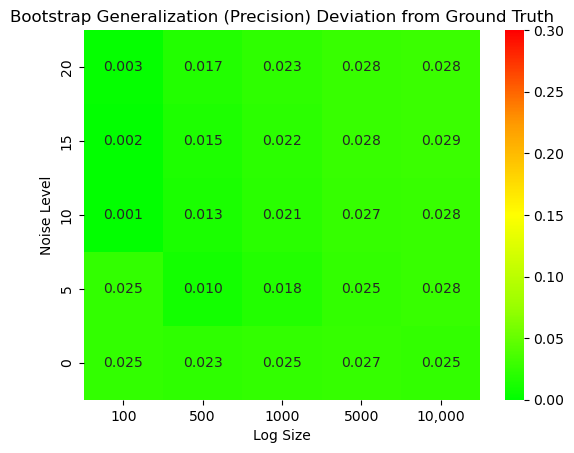

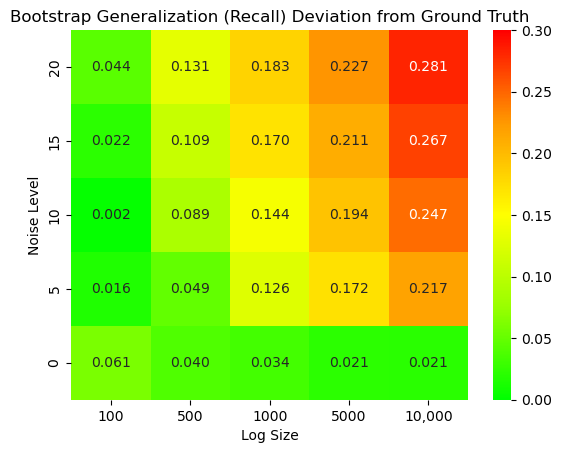

In [103]:
log_sizes = [100, 500, 1000, 5000, 10000]
noises = [0, 5, 10, 15, 20]

data_precision_0 = []
data_recall_0 = []

# Iterate through log_sizes and noises
for noise in noises:
    precision_row = []
    recall_row = []
    
    for log_size in log_sizes:
        csv_file = "/Users/anandik/OneDrive - The University of Melbourne/GR/Code/BootstrapGeneralizationBasic_GR copy/src/main/java/org/bootstrap/resources/log1/ia/output-" + str(log_size) + "-" + str(noise) + ".csv"
        precision_sum = 0.0
        recall_sum = 0.0
        num_rows = 0
        
        with open(csv_file, 'r') as file:
            csv_reader = csv.reader(file)
            for row in csv_reader:
                if len(row) >= 4:
                    precision = float(row[2])
                    recall = float(row[3])
                    precision_sum += precision
                    recall_sum += recall
                    num_rows += 1
        
        if num_rows > 0:
            precision_row.append(precision_sum / num_rows)
            recall_row.append(recall_sum / num_rows)
        else:
            precision_row.append(0.0)  # Handle the case where there are no rows
            recall_row.append(0.0)
    
    data_precision_0.append(precision_row)
    data_recall_0.append(recall_row)

# Print the 2D arrays
for row in data_precision_0:
    print(row)
    
for row in data_recall_0:
    print(row)
    
# ground truth
real_precisions = [0.8673107114012689, 0.8673107114813179, 0.8673107133593535, 0.8673106992552186, 0.8673107112920542]
real_recalls = [0.8673107114012663, 0.8673107114012671, 0.8673107114012675, 0.867310711401268, 0.8673107114012683]

real_precision = sum(real_precisions) / len(real_precisions)
real_recall = sum(real_recalls) / len(real_recalls)

print(real_precision)
print(real_recall)

deviation_precision_0 = []
for row in data_precision_0:
    precision_row = []
    for value in row:
        precision_row.append(abs(value - real_precision))
    deviation_precision_0.append(precision_row)

deviation_recall_0 = []
for row in data_recall_0:
    recall_row = []
    for value in row:
        recall_row.append(abs(value - real_recall))
    deviation_recall_0.append(recall_row)
    
print(deviation_precision_0 )
print(deviation_recall_0 )

x_labels = ['100', '500', '1000', '5000', '10,000']
y_labels = ['0', '5', '10', '15', '20']

boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

# Create the heatmap with the custom colormap
sns.heatmap(deviation_precision_0, annot=True, cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.3, fmt='.3f')

ax = plt.gca()
ax.invert_yaxis()

plt.title("Bootstrap Generalization (Precision) Deviation from Ground Truth")
plt.xlabel("Log Size")
plt.ylabel("Noise Level")

plt.savefig('precision_3_ia_1.svg', format='svg')

plt.show()

boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

# Create the heatmap with the custom colormap
sns.heatmap(deviation_recall_0, annot=True, cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.3, fmt='.3f')

ax = plt.gca()
ax.invert_yaxis()

plt.title("Bootstrap Generalization (Recall) Deviation from Ground Truth")
plt.xlabel("Log Size")
plt.ylabel("Noise Level")

plt.savefig('recall_3_ia_1.svg', format='svg')

plt.show()

In [113]:
log_sizes = [100, 500, 1000, 5000, 10000]
noises = [0, 5, 10, 15, 20]


for logSize in log_sizes:
    for noise in noises:
        csv_file = "/Users/anandik/OneDrive - The University of Melbourne/GR/Code/BootstrapGeneralizationBasic_GR copy 4/src/main/java/org/bootstrap/resources/log0/ooo/output-" +str(logSize)+"-" + str(noise) + ".csv"
#         precision_sum = 0.0
#         recall_sum = 0.0
#         num_rows = 0
        
        with open(csv_file, 'r') as file:
            csv_reader = csv.reader(file)
            for row in csv_reader:
                if len(row) >= 4:
                    precision = float(row[0])
                    recall = float(row[4])
                    print(recall)
#                     precision_sum += precision
#                     recall_sum += recall
#                     num_rows += 1
#         print (recall_sum/num_rows)

41.78
58.04
75.03
84.31
89.61
123.08
188.84
238.53
279.83
337.49
185.85
399.67
472.59
556.03
631.56
456.7
911.82
1235.33
1531.69
1810.9
632.09
1944.0
2410.59
2855.55
3268.6
